In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("properatti.csv")

In [3]:
data['price_aprox_usd'].isnull().sum()

20410

#Variables económicas#

Price, Currency, Price_aprox_usd, Price_aprox_local_currency
Como decisión de negocios, decidimos usar valores de precio en dólares unicamente, por lo que estos son los que intentaremos completar y depurar.

# EDA Price usd per m2

In [4]:
#Cantidad de casos en que 'price' coincide con 'Price_aprox_usd'. Tenemos 87588 que coinciden.

sum(data.price == data.price_aprox_usd)

87588

In [5]:
#Cantidad de casos en que 'price' no coincide con 'Price_aprox_usd'. Tenemos 33632 que no coinciden.
sum(data.price != data.price_aprox_usd)

33632

In [6]:
#Cantidad de casos en que 'price' coincide con 'price_aprox_local_currency'
sum(data.price == data.price_aprox_local_currency)

1

In [7]:
#Es uno solo, así que veo cuál es:

data[data.price == data.price_aprox_local_currency][['price', 'currency', 'price_aprox_usd', 'price_aprox_local_currency']]

,price,currency,price_aprox_usd,price_aprox_local_currency
9761,0.0,NaN,0.0,0.0


In [8]:
#Corroboro que todos los 'price' cuya 'currency' es USD se correspondan con el 'price_aprox_usd'

data2 = data[data.currency == 'USD']

In [9]:
#Valido si hay algun precio que sea distinto
len(data2[data2.price != data2.price_aprox_usd])

0

In [10]:
#veo que hay uno menos que los coincidentes en valor(87588 vs 87587), alguno debe estar mal etiquetado, lo busco.
len(data2)

87587

In [11]:
data[(data.price == data.price_aprox_usd) & (data.currency != 'USD')][['price', 'currency', 'price_aprox_usd', 'price_aprox_local_currency']]

,price,currency,price_aprox_usd,price_aprox_local_currency
9761,0.0,NaN,0.0,0.0


# Ahora analizamos aquellos valores cuyos 'currency' no son USD.


In [12]:
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [13]:
data[['price_aprox_usd', 'price']][data.currency == 'PEN']

,price_aprox_usd,price
50387,117139.33,380000.0
50388,292848.33,950000.0


In [14]:
data[['price_aprox_usd', 'price']][data.currency == 'UYU']

,price_aprox_usd,price
107390,22980378.29,650000000.0


In [15]:
auxData = data['description']


In [16]:
auxData = auxData.str.upper()
auxData = auxData.str.replace('.','', regex=True)
auxData.fillna('', inplace = True)
auxData.head()

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1    VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...
2    2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3    PH 3 AMBIENTES CON PATIO HAY 3 DEPTOS EN LOTE,...
4    DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
Name: description, dtype: object

In [17]:
auxData2 = auxData.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')
auxData2.head

<bound method NDFrame.head of           0      1
0       NaN    NaN
1       U$D  20000
2       NaN    NaN
3       NaN    NaN
4       NaN    NaN
...     ...    ...
121215  NaN    NaN
121216  NaN    NaN
121217  USD  20000
121218  U$S  95900
121219  NaN    NaN

[121220 rows x 2 columns]>

In [18]:
auxData2.columns=['USD', 'price']

In [19]:
auxData2.price.notnull().sum()

13039

Aplico al dataset


In [58]:
auxData2.price = pd.to_numeric(auxData2['price'])

In [59]:
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData2['price'])

In [60]:
data['price_aprox_usd'].isnull().sum()

17102

 Regex para tittle

In [61]:
auxData3 = data['title']

In [62]:
# formateo auxData3 para el regex

auxData3 = auxData3.str.upper()
auxData3 = auxData3.str.replace('.', '', regex=True)
auxData3.fillna('', inplace=True)

In [63]:
# hago la extracion
auxData4 = auxData3.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')

In [64]:
# renombro columnas
auxData4.columns = ['USD', 'price']

In [65]:
# tenemos 6948 precios que no son nulos
auxData4.price.notnull().sum()

6948

In [66]:
# paso a numero los precios
auxData4.price = pd.to_numeric(auxData4['price'])

Se aplica al dataset


In [67]:
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData4['price'])

In [68]:
# Todavia tenemos 17102 valores nulos para price
data['price_aprox_usd'].isnull().sum()

17102

# Completamos hasta ahora 3308 vacíos, quedandonos con 17102 datos vacíos.

Separo valores de precios muy extremos para revaluar con coherencia:


ymax: 129629628.45


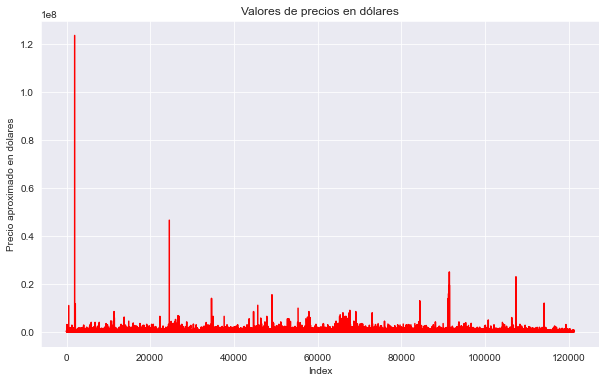

In [32]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(data.price_aprox_usd)), data.price_aprox_usd, color='red')

plt.xlabel('Index')
plt.ylabel('Precio aproximado en dólares')
plt.title('Valores de precios en dólares')

xmin, xmax, ymin, ymax = plt.axis()
print('ymax: %.2f'% ymax)

# EDA Price usd per m2


In [33]:
## precio por m2
data.price_usd_per_m2.describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [34]:

#Vemos los null
data.price_aprox_usd[data.price_aprox_usd.isnull()].index


Int64Index([     5,     20,     41,     62,     67,     76,     83,     84,
                85,    100,
            ...
            121126, 121127, 121129, 121142, 121207, 121208, 121210, 121211,
            121212, 121213],
           dtype='int64', length=17102)

In [35]:
len(data.price_aprox_usd[data.price_aprox_usd.isnull()].index)

17102

In [36]:
indices=data.price_usd_per_m2[data.price_usd_per_m2.isnull()].index
indices

Int64Index([     1,      3,      5,      9,     11,     20,     41,     62,
                65,     67,
            ...
            121152, 121155, 121156, 121207, 121208, 121210, 121211, 121212,
            121213, 121214],
           dtype='int64', length=52603)

In [37]:
len(data.price_usd_per_m2[data.price_usd_per_m2.isnull()].index)

52603

In [38]:
data.surface_total_in_m2[data.surface_total_in_m2.isnull()].index


Int64Index([     1,      3,      9,     11,     65,     68,     70,     71,
                72,     77,
            ...
            121148, 121149, 121150, 121151, 121152, 121155, 121156, 121207,
            121208, 121210],
           dtype='int64', length=39328)

In [39]:
len(data.surface_total_in_m2[data.surface_total_in_m2.isnull()].index)

39328

In [40]:
price_usd_per_m2_nuevo = data[['price_aprox_usd','surface_total_in_m2']]

price_usd_per_m2_nuevo = pd.DataFrame(price_usd_per_m2_nuevo.apply(lambda x: x['price_aprox_usd']/x['surface_total_in_m2'] 
                                   if(x['price_aprox_usd'] > 0 and x['surface_total_in_m2'] > 0 and x['price_aprox_usd'] > x['surface_total_in_m2']) 
                                   else np.nan, axis=1
                                  )
                     )

In [41]:
price_usd_per_m2_nuevo

,0
0,1127.272727
1,NaN
2,1309.090909
3,NaN
4,1828.571429
...,...
121215,7699.115044
121216,1383.333333
121217,2858.695652
121218,1997.916667


In [42]:
price_usd_per_m2_nuevo.mean()


0    2130.800129
dtype: float64

In [43]:
data.price_usd_per_m2.fillna(price_usd_per_m2_nuevo[0], inplace=True)


# Imputamos 2mil valores para los que estaban null, corregimos en caso de que el valor de price per m2 o surface fuera menor a 0, aplica Nan, caso contrario aplica la cuenta.


In [44]:
data.price_usd_per_m2.isnull().sum()

50222

Analizamos cómo fueron calculados los valores de precio por m2, para los datos que coinciden precio y precio_aprox_usd:

In [45]:
#total
data.loc[(data['price'] == data['price_aprox_usd'])].shape

(87588, 26)

In [46]:
#vacios
data.loc[(data['price'] == data['price_aprox_usd']) & (data['price_aprox_usd'].isnull())].shape

(0, 26)

In [47]:
#price usd o price y sup total (bien)

data.loc[(data['price'] == data['price_aprox_usd']) & (round(data['price_usd_per_m2'],2) == round((data['price_aprox_usd']/data['surface_total_in_m2']),2))].shape


(60133, 26)

In [48]:
##price usd o price y sup cubierta

data.loc[(data['price'] == data['price_aprox_usd']) & (round(data['price_usd_per_m2'],2) == round((data['price_aprox_usd']/data['surface_covered_in_m2']),2))].shape


(18400, 26)

Notamos que fueron calculados de diferenctes maneras y que también hay datos erróneos.

En todos los casos, reemplazamos la fórmula por la correcta:

In [49]:
data.price_usd_per_m2 = np.where((data['price'] != data['price_aprox_usd']) & (data['surface_total_in_m2'] != 0), data['price_aprox_usd']/data['surface_total_in_m2'], data['price_usd_per_m2'])


In [50]:
data.price_usd_per_m2 = np.where((data['price'] == data['price_aprox_usd'])  & (data['surface_total_in_m2'] != 0), data['price_aprox_usd']/data['surface_total_in_m2'], data['price_usd_per_m2'])


In [51]:
data.price_usd_per_m2.isnull().sum()


50010

In [52]:
# Confirmar, se hizo la media y se completaron los nan
data.price_usd_per_m2.fillna(data.groupby(['property_type', 'place_name'])['price_usd_per_m2'].transform('mean'), inplace=True)


In [53]:
data.price_usd_per_m2.isnull().sum()

1542